# GM ANUSHA 
# TASK 2 
# PREDICTION USING UNSUPERVISED LEARNING - K MEANS CLUSTER 

### IMPORTING LIBRARIES

In [12]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

### IMPORTING THE DATASET

In [15]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

#### FIRST 5 ROWS OF THE DATASET

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [18]:
clf = Perceptron(tol=1e-1, random_state=0,alpha=0.0025)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0025, tol=0.1)

### PREDICTION 

In [19]:
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

0.7333333333333333


### CONFUSION MATRIX

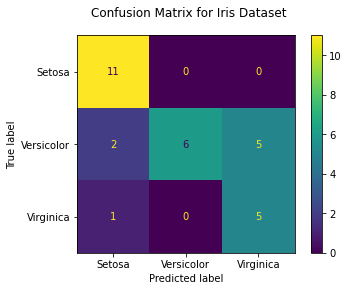

In [21]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

### NUMBER OF CLUSTERS REQUIRED FOR K MEAN CLASSIFICATION 

In [34]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### PLOTTING 

#### LINE GRAPH

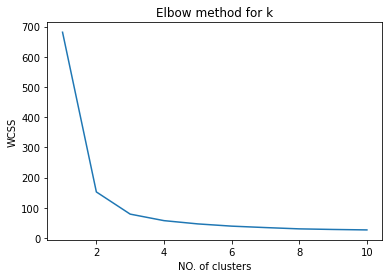

In [37]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method for k')
plt.xlabel('NO. of clusters')
plt.ylabel('WCSS') 
plt.show()

### PROCESSING DATA

In [42]:
X=iris_df.iloc[:,[0,1,2,3]].values

### K MEANS CLASSIFIER 

In [43]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### VISUALIZING

#### SCATTER PLOT

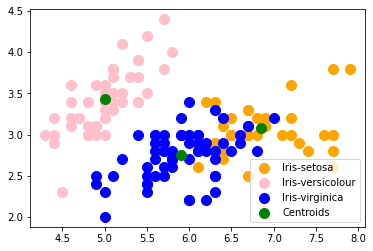

In [45]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()